# SD212: Graph Learning
## Lab 1: Graph Structure

In this lab, you will check some key properties of real graphs:
* the [friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox),
* the [power-law](https://en.wikipedia.org/wiki/Power_law#Power-law_probability_distributions) of degrees,
* the [small-world](https://en.wikipedia.org/wiki/Small-world_network) property,
* the tendency to [cluster](https://en.wikipedia.org/wiki/Clustering_coefficient).

## Import

In [23]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [24]:
from sknetwork.data import load_netset, erdos_renyi
from sknetwork.path import get_distances, get_shortest_path
from sknetwork.topology import get_clustering_coefficient
from sknetwork.utils import get_degrees, get_neighbors

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [25]:
openflights = load_netset('openflights')

Parsing files...
Done.


In [26]:
wikivitals = load_netset('wikivitals')

Parsing files...
Done.


In [27]:
cinema = load_netset('cinema')

Parsing files...
Done.


In [28]:
dataset = openflights

In [29]:
# adjacency matrix
adjacency = dataset.adjacency

In [30]:
adjacency

<3097x3097 sparse matrix of type '<class 'numpy.int64'>'
	with 36386 stored elements in Compressed Sparse Row format>

## 1. Friendship paradox

We first focus on the friendship paradox. We consider the Openflights dataset.

## To do

* Sample 100 random nodes. Compute their average degree.
* Sample 100 random neighbors of random nodes. Compute their average degree.
* Conclude.

In [31]:
degrees = get_degrees(adjacency)

In [32]:
node = 0
neighbors = get_neighbors(adjacency, node)

In [33]:
node = 0

rand_nodes = np.random.randint(adjacency.shape[0], size=100)
average_degree = np.mean(degrees[rand_nodes])
print('average degree ' + str(average_degree))

avg_deg_neighbo = []

for n in rand_nodes:
	neighbors = get_neighbors(adjacency, n)
	ran_neighb = np.random.choice(neighbors)
	avg_deg_neighbo.append(degrees[ran_neighb])

avg_deg_neighbo = np.mean(avg_deg_neighbo)
print('average neihbors degree ' + str(avg_deg_neighbo))

average degree 10.29
average neihbors degree 68.68


## 2. Power-law degrees

We now focus on the degree distribution.

We consider the empirical distributions of:
* degrees in the Openflights graph,
* in-degrees and out-degrees in the WikiVitals graph.

## To do

For each of these distributions:
* Plot the [tail distribution](https://en.wikipedia.org/wiki/Cumulative_distribution_function#Complementary_cumulative_distribution_function_(tail_distribution)) in log-log scale.
* Conclude: do you consider that these are power-law graphs?

In [34]:
def plot_loglog(degrees):
    """Plot the degree distribution in log-log scale and compare with that of a random graph.
    
    Parameters
    ----------
    degrees : array
        vector of degrees of the graph.
    """
    n = len(degrees)
    # comparison with a random graph
    p = np.sum(degrees) / n / (n-1) # link probability
    adjacency_random = erdos_renyi(n, p)
    degrees_random = get_degrees(adjacency_random)
    plt.loglog(np.sort(degrees), 1 - np.arange(n) / n, lw = 3, label='Real graph')
    plt.loglog(np.sort(degrees_random), 1 - np.arange(n) / n, lw = 3, label = 'Random graph')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

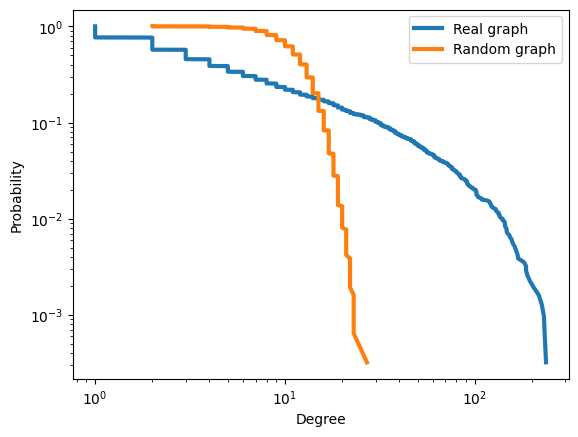

In [40]:
degrees_openflights = get_degrees(openflights.adjacency)
plot_loglog(degrees_openflights)

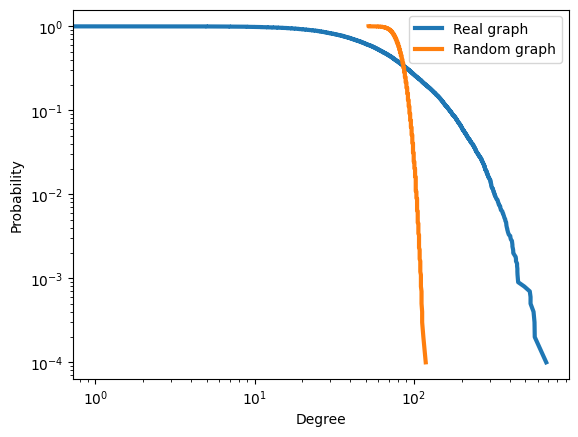

In [42]:
degrees_wikivitals = get_degrees(wikivitals.adjacency)
plot_loglog(degrees_wikivitals)

## 3. Small-world property

You will now make a few experiments highlighting the small-world property.

## To do

* Give a shortest path from [Plato](https://en.wikipedia.org/wiki/Plato) to [Platini](https://en.wikipedia.org/wiki/Michel_Platini) in WikiVitals.<br>
List the corresponding articles.

In [35]:
# graph of shortest paths
node = 0
adjacency_shortest_path = get_shortest_path(adjacency, node)

In [44]:
dataset = wikivitals
names = dataset.names
np.argwhere(names == 'Plato').ravel()

array([7108], dtype=int64)

In [45]:
adjacency_shortest_path = get_shortest_path(adjacency,7108)
neighbors = get_neighbors(adjacency_shortest_path, 5893, transpose=True)
path = []

while 7108 not in neighbors:
	new_neighbor = np.random.choice(neighbors)
	neighbors = get_neighbors(adjacency_shortest_path, new_neighbor, transpose=True)
	path.append(new_neighbor)

from IPython.display import SVG
from sknetwork.visualization import visualize_graph

indexes = path + [5893, 7108]
filtered_adj = adjacency_shortest_path[indexes, :][:, indexes]
image = visualize_graph(filtered_adj, names = names[indexes])
SVG(image)

IndexError: index 7108 is out of bounds for axis 0 with size 3097

## To do

* Which fraction of the airports can be reached from **Paris Charles de Gaulle** in 1, 2, 3 flights?
* Which fraction of the articles can be reached from **Paris** in 1, 2, 3 clicks on Wikipedia Vitals?

In [36]:
# distances
node = 0
distances = get_distances(adjacency, 0)

In [ ]:
dataset = openflights
adjacency = dataset.adjacency

node = 0

## To do

* Compute the [Bacon number](https://fr.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon) of all actors (**without** building the co-starring actor graph).
* Plot the corresponding histogram.

In [37]:
dataset = cinema
# biadjacency matrix
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col


## 4. Clustering coefficient

Finally, we check the clustering property of real graphs (my friends tend to be friends).

## To do


* Compute the clustering coefficient of Openflights.
* Compare with that of a random graph of same size and same average degree.

In [38]:
dataset = openflights
adjacency = dataset.adjacency

In [39]:
get_clustering_coefficient(adjacency)

0.25107219520077